In [14]:
import sys
import matplotlib.pyplot as plot
from describe import DataSet
from describe import Math_calculat
from scatter_plot import Scatter_Plot
from histogram import Histogram
import numpy as np

class Pair_Plot:
    def __init__(self, file='datasets/dataset_train.csv', max_nb_columns=3, size=10, fig_size=(8,8)):
        self.file_name = file
        self.y_col = 1
        self.max_nb_columns = max_nb_columns
        self.size = size
        self.fig_size = fig_size
        if max_nb_columns < 0 or size < 0:
            print ("Error: bad parameter : max_nb_columns or size")
            sys.exit()
    
    def Plot(self):
        ds = DataSet(self.file_name)
        ds.find_numeric_label()
        if self.max_nb_columns > (len(ds.numeric_columns)):
            self.max_nb_columns = len(ds.numeric_columns)
        
        color = {
                    'Ravenclaw': 'b',
                    'Gryffindor': 'r',
                    'Slytherin': 'g',
                    'Hufflepuff': 'yellow'
                }
    
        fig, ax = plot.subplots(self.max_nb_columns, self.max_nb_columns, figsize=self.fig_size)
        
        fig.tight_layout() 
        N = self.max_nb_columns
        for i in range(N):
            col1 = ds.get_float_col(ds.numeric_columns[i])[:self.size]
            for j in range(N):
                col2 = ds.get_float_col(ds.numeric_columns[j])[:self.size]
                feature1 = {}
                feature2 = {}
                for k in set(ds.get_col(self.y_col)):
                    feature1[k] = []
                    feature2[k] = []
                for k in range(1, len(ds.dataset[:self.size])):
                    feature1[ds.dataset[k][self.y_col]].append(col1[k - 1])
                    feature2[ds.dataset[k][self.y_col]].append(col2[k - 1])
                if i == 0:
                    ax[i, j].xaxis.set_label_position('top')
                    ax[i, j].set_xlabel(ds.dataset[0][ds.numeric_columns[j]], rotation=0)
                if j == 0:
                    ax[i, j].set_ylabel(ds.dataset[0][ds.numeric_columns[i]], rotation=90)
                if (i == j):
                    statistic = Math_calculat(col1)
                    bins = np.linspace(statistic.Quartile(0), statistic.Quartile(1))                    
                    for k in feature1.keys():
                        ax[i, j].hist(feature1[k], bins, facecolor=color[k], alpha=0.5, label=k)

                else:
                    for k in feature1.keys():
                        ax[i, j].scatter(feature1[k], feature2[k], c=color[k], alpha=0.5, label=k)
        
        plot.legend(loc='lower right')
        plot.show()

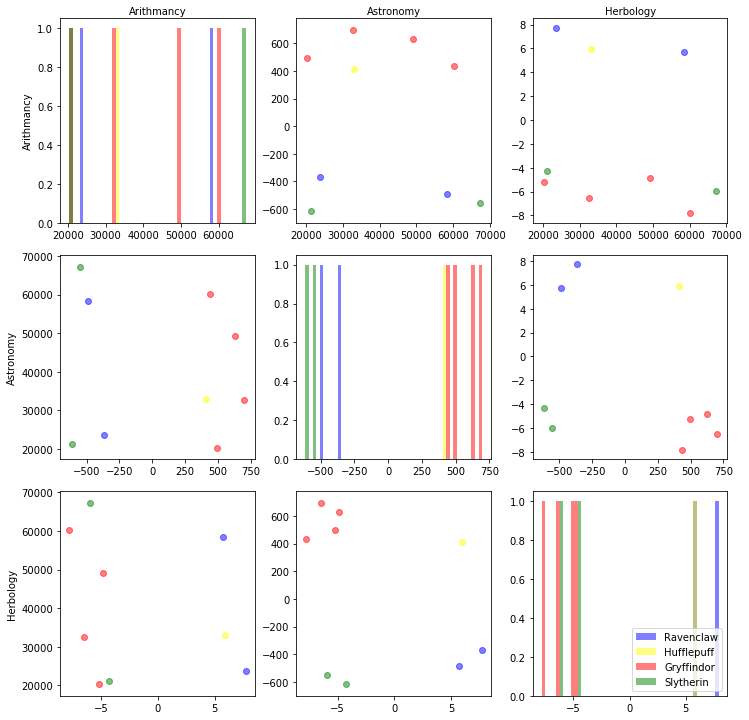

In [15]:
pr = Pair_Plot()
pr.Plot()